In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
folder_name = "BIC_subtypes"
# stmf
distances = np.genfromtxt("results/" + folder_name + "/distances.csv", delimiter=',')
distance_correlation = np.genfromtxt("results/" + folder_name + "/distance_correlation.csv", delimiter=',')
pearson_correlation = np.genfromtxt("results/" + folder_name + "/pearson_correlation.csv", delimiter=',')
spearman_correlation = np.genfromtxt("results/" + folder_name + "/spearman_correlation.csv", delimiter=',')
# nmf
distances_nmf = np.genfromtxt("results/" + folder_name + "/distances_nmf.csv", delimiter=',')
distance_correlation_nmf = np.genfromtxt("results/" + folder_name + "/distance_correlation_nmf.csv", delimiter=',')
pearson_correlation_nmf = np.genfromtxt("results/" + folder_name + "/pearson_correlation_nmf.csv", delimiter=',')
spearman_correlation_nmf = np.genfromtxt("results/" + folder_name + "/spearman_correlation_nmf.csv", delimiter=',')

In [2]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

def ClusterIndicesComp(clustNum, labels_array): #list comprehension
    return np.array([i for i, x in enumerate(labels_array) if x == clustNum])

def plot_patients(X, y_kmeans):
    first_cluster = np.argwhere(y_kmeans == 1).flatten() # label 1
    second_cluster = np.argwhere(y_kmeans == 2).flatten() # label 2
    third_cluster = np.argwhere(y_kmeans == 0).flatten() # label 0
    print(X.shape)
    #plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(X[first_cluster, 0], X[first_cluster, 1], c=np.ones(len(first_cluster)), s=50, marker="*", cmap='viridis')
    plt.scatter(X[second_cluster, 0], X[second_cluster, 1], c=np.full(len(second_cluster), 2), s=50, marker="o", cmap='viridis')
    plt.scatter(X[third_cluster, 0], X[third_cluster, 1], c=np.full(len(third_cluster), 0), s=50, marker="x", cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.title("NMF")
    plt.xlabel("Euclidean norm on original data")
    plt.ylabel("Euclidean norm on centered data")
    plt.savefig("results/" + folder_name + "/clusters.png")

In [3]:
X = np.vstack((distances, distance_correlation_nmf)).T
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
# 0 - purple, 2 - yellow, 1 - green
np.argwhere(y_kmeans == 2).flatten()

array([262, 277, 283, 284, 292, 293, 299, 300, 304, 307, 310, 312, 324,
       325, 327, 329, 333, 334, 337, 341, 343, 344, 347, 348, 351, 353,
       355, 357, 358, 359, 361, 366, 367, 368, 369, 370, 372, 373, 376,
       377, 378, 379, 380, 382, 383, 384, 385, 386, 388, 390, 392, 393,
       394, 395, 398, 400, 401, 406, 414, 415, 416, 417, 420, 422, 425,
       433, 437, 442, 448, 458, 461, 462, 470, 471, 472, 481, 482, 488,
       490, 493, 495, 498, 500, 504, 509, 513, 525, 535])

In [5]:
y_kmeans[525] = 1 # green
y_kmeans[535] = 0 # purple
y_kmeans[416] = 0
y_kmeans[422] = 0
y_kmeans[458] = 0
y_kmeans[383] = 0

(541, 2)


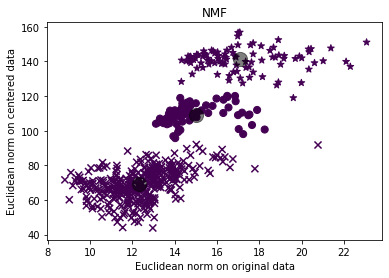

In [6]:
#y_kmeans[470] = 0
plot_patients(X, y_kmeans)

In [7]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2,

In [8]:
kmeans.cluster_centers_

array([[ 12.2967992 ,  68.98405368],
       [ 17.10148478, 141.20066433],
       [ 15.01572099, 108.94234572]])

In [9]:
first_cluster = np.argwhere(y_kmeans == 1).flatten() # upper
second_cluster = np.argwhere(y_kmeans == 2).flatten() # middle
third_cluster = np.argwhere(y_kmeans == 0).flatten()  # bottom

In [10]:
#first_cluster
np.savetxt("results/" + folder_name + "/first_cluster.csv", first_cluster, delimiter=',')

In [11]:
#second_cluster
np.savetxt("results/" + folder_name + "/second_cluster.csv", second_cluster, delimiter=',')

In [12]:
#second_cluster
np.savetxt("results/" + folder_name + "/third_cluster.csv", third_cluster, delimiter=',')